In [2]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import glob
from PIL import Image
from keras.models import load_model
import utils
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)


filelist = glob.glob("C:/Users/Tron/Desktop/Herbie/Data/Image2/*.jpg")

print("Load Model")
model = load_model('Data/Model/model-008.h5')
print("Model bereit")


Load Model
Model bereit


In [3]:
data_df = pd.read_csv(os.path.join(os.getcwd(), 'Data/Log', 'driving_log2.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

P = data_df['center'].values
Y = data_df['steering'].values


In [4]:
i=0
S = []
shape=Y.shape[0]
print(shape)
while i <= (shape - 1):
    d = P[i]
    img = cv2.imread(d)
    img = utils.preprocess(img)
    S.append (img)
    i = i +1
X = np.array(S)


980


X.shape:  (980, 66, 200, 3)
Y.shape:  (980,)


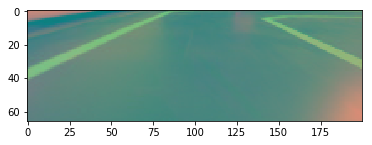

In [5]:

print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)
imshow(X[0])

In [6]:
test_P = model.predict(X)

In [7]:
test_P = pd.DataFrame(test_P,columns=['steer','thrott'])
H = test_P['steer'].values
print(H.shape)



(980,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000255E4A58320>,
      dtype=object)

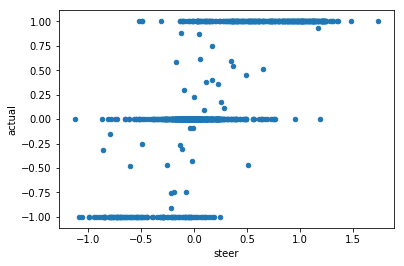

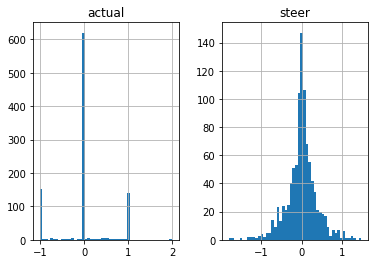

In [11]:
df1 = pd.DataFrame({'steer':H, 'actual':Y})
ax = df1.plot.scatter('steer', 'actual')
df1.diff().hist(bins=50)

In [ ]:

for fname in filelist:
    image = mpimg.imread(fname)
    

    #__image2 = cv2.cvtColor(__image1, cv2.COLOR_BGR2RGB) 

    __image1 = utils.preprocess(image)
    __image2 = np.asarray(__image1, dtype=np.float32)
    __image = np.array([__image2]) 

    cv2.imshow('image',__image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows          

    __steering_angle = model.predict(__image, batch_size=1)
    steer = __steering_angle[0][0]
    throt = __steering_angle[0][1]
    throt = throt * -1
    if steer < -1:
        steer = -1
    if steer > 1:
        steer = 1
    

    #steer = int(steer * 120)
    print ("Lenken ------------------")
    print(steer)

                


Lenken ------------------
-0.021086464
Lenken ------------------
0.042758387
Lenken ------------------
0.050229248
Lenken ------------------
0.19940536
